# 房价预测的例子
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

特征工程和demo1 类似，主要是讲述模型优化，超参数优化，模型融合的技巧

In [38]:

import numpy as np
import pandas as pd

In [39]:
train_df = pd.read_csv('../input/train.csv', index_col=0)
test_df = pd.read_csv('../input/test.csv', index_col=0)


# 1 检查数据源

In [40]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [41]:
train_df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


# 2 合并数据
把 training data和test data 合并起来进行预处理，预处理结束后再分割为training data 和test data

首先 SalePrice作为训练目标，只会出现在训练集中，不会出现在测试集中，首先将SalePrice拿出来

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b8aa710>,
      dtype=object)

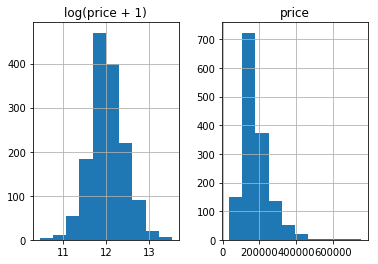

In [42]:
%matplotlib inline
prices = pd.DataFrame({"price" :  train_df['SalePrice'], 'log(price + 1)': np.log1p(train_df['SalePrice'])})
prices.hist()

In [43]:
# label 数据不平滑，需要将label数据标准化，使其尽量符合正态分布。
y_train = np.log1p(train_df.pop('SalePrice'))   # 训练集的目标值，进行了平滑处理

In [44]:
all_df = pd.concat((train_df, test_df),axis=0)

In [45]:

all_df.shape

(2919, 79)

In [46]:
y_train.head()

Id
1    12.247699
2    12.109016
3    12.317171
4    11.849405
5    12.429220
Name: SalePrice, dtype: float64

# 3 变量转化（特征工程）

## 3.1 转化变量属性

In [47]:

all_df['MSSubClass']

Id
1        60
2        20
3        60
4        70
5        60
6        50
7        20
8        60
9        50
10      190
11       20
12       60
13       20
14       20
15       20
16       45
17       20
18       90
19       20
20       20
21       60
22       45
23       20
24      120
25       20
26       20
27       20
28       20
29       20
30       30
       ... 
2890     30
2891     50
2892     30
2893    190
2894     50
2895    120
2896    120
2897     20
2898     90
2899     20
2900     80
2901     20
2902     20
2903     20
2904     20
2905     20
2906     90
2907    160
2908     20
2909     90
2910    180
2911    160
2912     20
2913    160
2914    160
2915    160
2916    160
2917     20
2918     85
2919     60
Name: MSSubClass, Length: 2919, dtype: int64

In [48]:
all_df['MSSubClass'].head()

Id
1    60
2    20
3    60
4    70
5    60
Name: MSSubClass, dtype: int64

In [49]:
all_df['MSSubClass']=all_df['MSSubClass'].astype(str)

In [50]:
all_df['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

## 3.2 把category转化成numerical表达形式
 one-hot形式 独热码  get_dummies 方法可以实现one-hot操作

In [51]:
pd.get_dummies(all_df['MSSubClass'], prefix='MSSubClass').head()

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
Id,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [52]:
# 同理，把所有category数据都转化成one-hot
all_dummy_df =  pd.get_dummies(all_df)
all_dummy_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


## 3.3 处理本身就是numerical的变量


In [53]:
all_dummy_df.isnull().sum().sort_values(ascending = False).head()

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
dtype: int64

可以看到，缺失最多的column是LotFrontage，这里使用平均值进行填充


In [54]:
mean_cols = all_dummy_df.mean()
mean_cols.head(10)

LotFrontage        69.305795
LotArea         10168.114080
OverallQual         6.089072
OverallCond         5.564577
YearBuilt        1971.312778
YearRemodAdd     1984.264474
MasVnrArea        102.201312
BsmtFinSF1        441.423235
BsmtFinSF2         49.582248
BsmtUnfSF         560.772104
dtype: float64

In [55]:
all_dummy_df =  all_dummy_df.fillna(mean_cols)

In [56]:
all_dummy_df.isnull().sum().sum()

0

## 3.4 标准化 numerical数据（非必要）
这一步非必要。
一般来说，最好把源数据放在一个标准分布中。
不需要对one-hot数据标准化

In [57]:
# 查看那些numerical
numeric_cols = all_df.columns[all_df.dtypes != 'object']
numeric_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

 计算标准分布 （ x -X）/S : X 均值， S标准差

In [58]:
numeric_col_mean = all_dummy_df.loc[:,numeric_cols].mean()
numeric_col_std = all_dummy_df.loc[:, numeric_cols].std()
all_dummy_df.loc[:,numeric_cols] =  (all_dummy_df.loc[:,numeric_cols] - numeric_col_mean) /numeric_col_std

# 4 建立模型

把数据集分回训练集和测试集

In [59]:
dummy_train_df = all_dummy_df.loc[train_df.index]
dummy_test_df = all_dummy_df.loc[test_df.index]

In [60]:
dummy_train_df.shape, dummy_test_df.shape

((1460, 303), (1459, 303))

单个分类器的效果是有限的。实际上会倾向于把多个分类器合在一起，做一个"综合分类器"以达到最好的效果

## 4.1 Ridge  Regression

用Ridge Regression模型先跑一遍看看。

In [61]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score


In [62]:
# 将DataFrame转化成Numpy Array，这跟sklearn更加适合
X_train = dummy_train_df.values
X_test = dummy_test_df.values


In [63]:
# 用sklearn自带的cross_validation方法测试模型
# 这里使用一个loop进行交叉验证，更好的方式是GridSearchCV
alphas = np.logspace(-3, 2, 50)
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

Text(0.5,1,'alpha vs CV error')

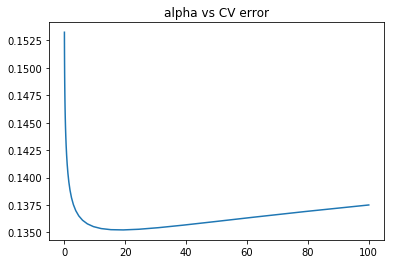

In [64]:

# 打印 结果和alpha的关系图
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(alphas, test_scores)
plt.title("alpha vs CV error")

In [65]:
from sklearn.linear_model import Ridge
ridge =  Ridge(alpha=15)

可见，大概alpha在10到20左右，Ridge达到最优的结果， score为0.135左右

# 4.2 Bagging 
把很多小分类器放在一起，每个train随机的一部分数据，然后把他们的最终结果综合起来（多数投票的方式

sklearn已经提供了一套架构：

In [66]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score

在这里，用CV结果来测试不同的分类器个数对最后结果的影响。

注意在部署bagging时，需要把它 base_estimator 里填上小分类器(ridge)

In [67]:
params = [1,10,15,20,25,30,40]
test_scores = []
for param in params:
    # bagging只是一个算法框架，也是调用base_estimator中的predict来做的
    clf = BaggingRegressor(n_estimators= param, base_estimator= ridge)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

Text(0.5,1,'parma vs CV error')

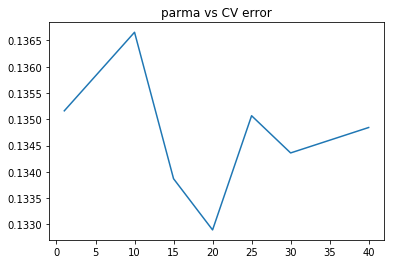

In [68]:
plt.plot(params, test_scores)
plt.title("parma vs CV error")

##  4.3  Boosting

Boosting理论上比Bagging更高级

Text(0.5,1,'parm vs CV error')

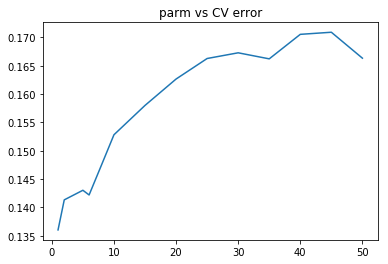

In [69]:
from sklearn.ensemble import AdaBoostRegressor

params = [1,2,5,6,8,10,15,20,25,30,35,40,45,50]
test_scores = []
for param in params:
    # bagging只是一个算法框架，也是调用base_estimator中的predict来做的
    clf = AdaBoostRegressor(n_estimators= param, base_estimator= ridge)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(params, test_scores)
plt.title("parm vs CV error")

## 4.3 XGboost

In [70]:
from xgboost import XGBRegressor


In [ ]:
parmas = [1,2,3,4,5,6]
test_scores = []
for param in params:
    clf= XGBRegressor(max_depth=param)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(test_score)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(params, test_scores)
plt.title("max_depth vs CV error")

NameError: name 'params' is not defined